<a href="https://colab.research.google.com/github/hawkeyedatatsai/Maching-Learning-Mock-Regression/blob/main/Maching_Learning_Mock_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Your task is to use [this dataset](https://docs.google.com/spreadsheets/d/1vxUH72hoDYbEdTOMYvr0XnmnDDm6AewWVzzFzn6c_jE/edit?usp=sharing) to predict the ***weight*** of a fish. The original dataset is from Kaggle.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
df = pd.read_csv("/content/1-Fish.csv")
print(df.shape)
print(df.info())
df.head()

(159, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  150 non-null    float64
 5   Height   156 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,157.000000,157.000000,150.000000,156.000000,157.000000
mean,398.326415,26.080255,28.168153,31.196000,8.907132,4.416820
std,357.978317,9.939357,10.407117,11.071718,4.250476,1.695044
min,0.000000,7.500000,8.400000,10.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.275000,5.949000,3.375600
50%,273.000000,25.000000,27.000000,29.700000,7.733000,4.248500
75%,650.000000,32.500000,35.000000,39.575000,12.038100,5.589000
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


#Prepare/clean the data for exploratory analysis purposes:


##Check for missing values. You should produce an output that shows the number of missing values for each feature.


In [ ]:
# Check to see if there are any duplicate rows
df.duplicated().sum()
# result suggests no duplicate rows

0

In [ ]:
# Display the sum of missing values
df.isna().sum()
# result suggests missing values on both categorical and numerics column
# Weight, target to be, has no missing values

Species    4
Weight     0
Length1    2
Length2    2
Length3    9
Height     3
Width      2
dtype: int64

##For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).

In [ ]:
df["Species"].value_counts()

Perch        53
Bream        33
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Beam          2
Name: Species, dtype: int64

In [ ]:
# on numeric
mean_imputer = SimpleImputer(strategy = "mean")

# on nominal
missing_imputer = SimpleImputer(strategy="most_frequent")

##Write a justification of your strategy for imputing missing values.

For the numercial columns, I use simpleimputer with mean strategy because most of the mean are close to 50% ; for the nominal columns, simpleimputer function with most frequent strategy are used since a huge portion of it are "Perch"

##Make sure you avoid any data leakage when you impute values.


##Ensure data types match the data types listed in the data dictionary (if given).


from df.info and reading through Dtype, species is objective and the rest are numercial. Therefore, the data types in general matches our understanding.

##Check for and address any inconsistent values in categorical columns.

In [ ]:
# there is only one categorial col and that is Species
print(df.describe(include='object')) 

       Species
count      155
unique       8
top      Perch
freq        53


In [ ]:
df["Species"].value_counts()
# looking up online, safe to say Beam should be Bream instead

Perch        53
Bream        33
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Beam          2
Name: Species, dtype: int64

In [ ]:
df['Species'] = df['Species'].replace('Beam', 'Bream')
df['Species'].value_counts()

Perch        53
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

##Check for and address any impossible values in numeric columns.

In [ ]:
df.describe()
# weight min = 0 is suspicious, the rest look fine

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,157.000000,157.000000,150.000000,156.000000,157.000000
mean,398.326415,26.080255,28.168153,31.196000,8.907132,4.416820
std,357.978317,9.939357,10.407117,11.071718,4.250476,1.695044
min,0.000000,7.500000,8.400000,10.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.275000,5.949000,3.375600
50%,273.000000,25.000000,27.000000,29.700000,7.733000,4.248500
75%,650.000000,32.500000,35.000000,39.575000,12.038100,5.589000
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


In [ ]:
df[df["Weight"] == 0]
# result below suggests one row with Weight = 0 and I plan to drop it

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [ ]:
df.drop(df.loc[df["Weight"] == 0].index, inplace=True)

In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,156.000000,156.000000,149.000000,155.000000,156.000000
mean,400.847468,26.125641,28.217308,31.252349,8.922822,4.423649
std,357.697796,9.955034,10.422334,11.087457,4.259720,1.698335
min,5.900000,7.500000,8.400000,10.800000,1.728400,1.047600
25%,121.250000,19.075000,21.000000,23.500000,5.944800,3.390675
50%,281.500000,25.100000,27.150000,30.000000,7.786000,4.277050
75%,650.000000,32.550000,35.250000,39.600000,12.143400,5.623650
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


#Explore the data:


In [ ]:
# split X and y, you are predicting price
y = df['Weight']
X = df.drop(columns=['Weight'])

# split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(118, 6)
(40, 6)


##Create at least two different types of exploratory visualizations.


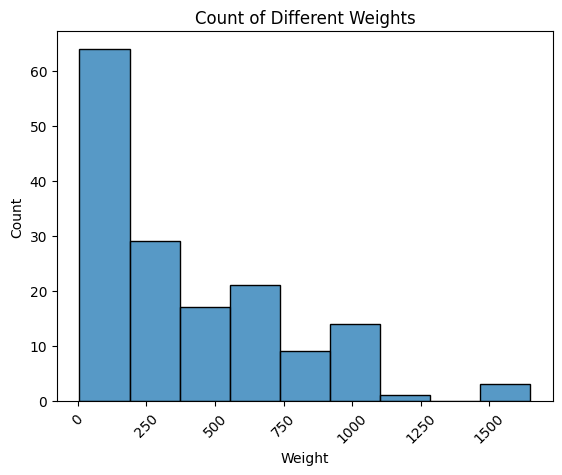

In [ ]:
# Histogram
ax = sns.histplot(data=df, x='Weight', bins="auto", edgecolor = 'black') 
ax.tick_params(axis='x', rotation = 45)
## Set the Title
ax.set_title('Count of Different Weights');

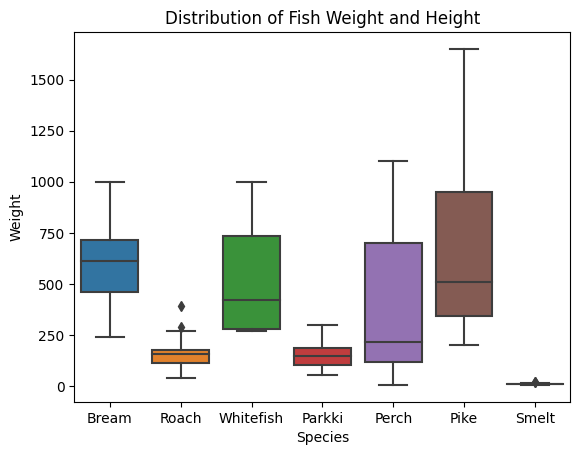

In [ ]:
# Boxplot
ax = sns.boxplot(x='Species', y='Weight', data=df)
ax.set_title("Distribution of Fish Weight and Height");

<ipython-input-18-8e156e2d3ddd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

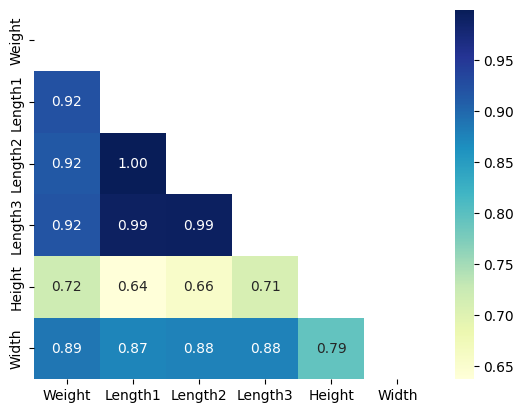

In [ ]:
# Heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, fmt=".2f", mask = mask)

##Write one to two sentences about what each visualization tells you about the data.

- Histogram shows the number of weights that occur in a particular range of values. Looks like most of the species are Perch.

- On boxplot, we compare the distribution on weight on each species. It is observed that there are visible outliers on Roach. And the weight on Pike varies broader.

- Heatmap suggests the correlation bewteen all numercial columns. We can observe from results above that weight has very high corr with Length 1, Length 2 and Length 3.

#Prepare the data appropriately for modeling:


##Implement a preprocessing pipeline to avoid data leakage.Scale the data if your model requires it.


In [ ]:
# on numeric
scaler = StandardScaler()
num_pipeline = make_pipeline(mean_imputer, scaler)
num_selector = make_column_selector(dtype_include="number")
num_tuple = (num_pipeline, num_selector)
# on nominal
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
nom_pipeline = make_pipeline(missing_imputer, ohe)
nom_selector = make_column_selector(dtype_include="object")
nom_selector = (nom_pipeline, nom_selector)
# Instantiate the make column transformer
preprocessor = make_column_transformer(num_tuple, nom_selector, remainder="drop", verbose_feature_names_out=False)
# Fit to X train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f75300820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f75304130>)],
                  verbose_feature_names_out=False)

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

cols = preprocessor.get_feature_names_out() 

# Transform np arrays to dataframes
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

# View the transformations 
X_train_df = pd.DataFrame(X_train_processed, columns=cols)
X_test_df = pd.DataFrame(X_test_processed, columns=cols)
X_test_df.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.587950,0.615743,0.650650,-0.767138,-0.144867,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.503795,-0.532267,-0.584173,-0.557662,-0.650735,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.434818,1.464272,1.393474,-0.489263,0.037925,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.299647,-1.350848,-1.529585,-1.472273,-1.414577,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.554811,-0.532267,-0.680644,-0.730277,-0.469157,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_df.describe().round(2)

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,0.07,0.15,0.07,0.13,0.06,0.22,0.08,0.35,0.12,0.05,0.12,0.05
std,1.03,1.12,1.15,1.18,1.09,0.42,0.27,0.48,0.33,0.22,0.33,0.22
min,-1.63,-1.73,-1.88,-1.76,-1.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.58,-0.59,-0.67,-0.73,-0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.11,-0.06,-0.10,-0.03,-0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.66,0.95,0.93,0.96,0.88,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,2.66,2.81,2.76,2.53,2.27,1.00,1.00,1.00,1.00,1.00,1.00,1.00


##Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).

There are two types of columns in this dataset: numercial and nominal. The former ones, I simply scale them and the latter one, OneHotEncoder is applied to let computer find relationships between the nominal and other variables in the context of a dataset.

#Create and compare at least 2 different models:

Since we are predicting "Weights" so it is a regression model. So I plan to use desicion tree and bagged tree models.

##Put your preprocessing and models into pipelines.


##For each model type, create a default version of each model with default hyperparameters.


###Decision Tree

In [ ]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(preprocessor, dt)
dt_pipe.fit(X_train, y_train)
dt_train_pred = dt_pipe.predict(X_train)
dt_test_pred = dt_pipe.predict(X_test)

###Bagged Tree

In [ ]:
bagreg = BaggingRegressor(random_state = 42)
bagreg_pipe = make_pipeline(preprocessor, bagreg)
bagreg_pipe.fit(X_train, y_train)
bt_train_pred = bagreg_pipe.predict(X_train)
bt_test_pred = bagreg_pipe.predict(X_test)


##Create additional versions of each model type where you tune hyperparameters for each model.


###Tune decision tree

In [ ]:
dt.get_depth()

12

In [32]:
# from "GridSearchCV and Pipelines" AND CHATGPT
params = {'decisiontreeregressor__max_depth': range(1,12), # Add decisiontreeregressor__ prefix to specify the estimator
          'decisiontreeregressor__min_samples_leaf': [3,15,20], # Same for min_samples_leaf and min_samples_split
          'decisiontreeregressor__min_samples_split': [2, 10, 100]}
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(preprocessor, dt)
dt_gs = GridSearchCV(dt_pipe, params, cv=5)
dt_gs.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f75300820>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f75304130>)],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': range(1, 12),
                         'decisiontreeregressor__min_samples_leaf': [3, 15, 20],
                         'decisiontreeregressor__min_samples_split': [2, 10,
                                                                      100]})

In [35]:
dt_gs.best_estimator_
tuned_dt_best_model = dt_gs.best_estimator_
tuned_dt_best_model.fit(X_train, y_train)
tuned_dt_train_pred = tuned_dt_best_model.predict(X_train)
tuned_dt_test_pred = tuned_dt_best_model.predict(X_test)

###Tune bagging tree

In [39]:
params = {"baggingregressor__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
bagreg = BaggingRegressor(random_state = 42)
bagreg_pipe = make_pipeline(preprocessor, bagreg)
bagreg_gs = GridSearchCV(bagreg_pipe, params, cv=5)
bagreg_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f75300820>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f75304130>)],
                                                          verbose_feature_names_out=False)),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             param_grid={'baggingregressor__n_estimators': [10, 20, 30, 40, 50,
                                                            60, 70, 80, 90,
                                                            100]})

In [42]:
bagreg_gs.best_estimator_
tuned_bt_best_model = bagreg_gs.best_estimator_
tuned_bt_best_model.fit(X_train, y_train)
tuned_bt_train_pred = tuned_bt_best_model.predict(X_train)
tuned_bt_test_pred = tuned_bt_best_model.predict(X_test)

##Use appropriate metrics to evaluate each model.

In [40]:
## Evaluation function
def evaluate_model(true,pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    print(f' MAE: {mae}, \n MSE: {mse}, \n RMSE: {rmse:}, \n R2: {r2}')

In [43]:
# Evaluate Training Data on Different models
print('Decision Tree Train Evaluation')
evaluate_model(y_train, dt_train_pred)
print('\nTuned Decision Tree Train Evaluation')
evaluate_model(y_train, tuned_dt_train_pred)
print('\nBagging Tree Train Evaluation')
evaluate_model(y_train, bt_train_pred)
print('\nTuned Bagging Tree Train Evaluation')
evaluate_model(y_train, tuned_bt_train_pred)


Decision Tree Train Evaluation
 MAE: 0.423728813559322, 
 MSE: 10.59322033898305, 
 RMSE: 3.2547227745205967, 
 R2: 0.9999154081959117

Tuned Decision Tree Train Evaluation
 MAE: 24.765564971751413, 
 MSE: 1421.72820527307, 
 RMSE: 37.70581129312921, 
 R2: 0.9886468373206037

Bagging Tree Train Evaluation
 MAE: 17.232627118644064, 
 MSE: 702.1540855932196, 
 RMSE: 26.498190232414355, 
 R2: 0.9943929722079253

Tuned Bagging Tree Train Evaluation
 MAE: 17.232627118644064, 
 MSE: 702.1540855932196, 
 RMSE: 26.498190232414355, 
 R2: 0.9943929722079253


In [44]:
# Evaluate Testing Data on Different models
print('Decision Tree Test Evaluation')
evaluate_model(y_test, dt_test_pred)
print('\nTuned Decision Tree Test Evaluation')
evaluate_model(y_test, tuned_dt_test_pred)
print('\nBagging Tree Test Evaluation')
evaluate_model(y_test, bt_test_pred)
print('\nTuned Bagging Tree Test Evaluation')
evaluate_model(y_test, tuned_bt_test_pred)

Decision Tree Test Evaluation
 MAE: 60.3875, 
 MSE: 10133.851749999998, 
 RMSE: 100.66703407769594, 
 R2: 0.9227677948979912

Tuned Decision Tree Test Evaluation
 MAE: 62.227125, 
 MSE: 9634.782098371914, 
 RMSE: 98.15692588081554, 
 R2: 0.9265713091634065

Bagging Tree Test Evaluation
 MAE: 49.116916666666675, 
 MSE: 6051.247891944447, 
 RMSE: 77.78976727015223, 
 R2: 0.9538821733489685

Tuned Bagging Tree Test Evaluation
 MAE: 49.116916666666675, 
 MSE: 6051.247891944447, 
 RMSE: 77.78976727015223, 
 R2: 0.9538821733489685


#Choose one final model:
Write a justification of your choice of the final model.

1. model selection: 
- Bagging tree default and tuned have similiar testing results with RMSE=49.11,  and 